In [4]:
import pandas as pd

df = pd.read_csv("../../data/Default.csv")

df.head()


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [7]:
df.shape

(10000, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [9]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [ ]:
# unbalanced dataset
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

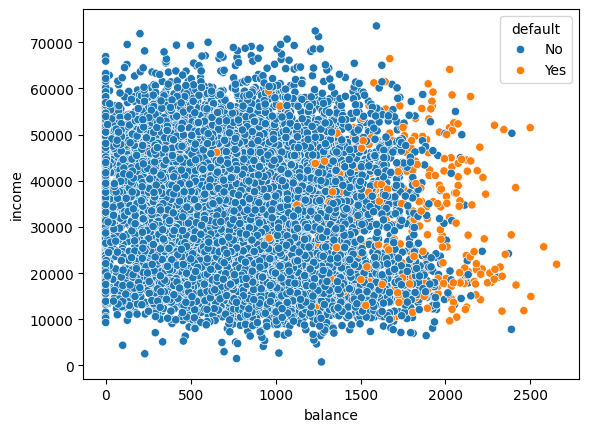

In [ ]:
import seaborn as sns 

sns.scatterplot(data=df, x = "balance", y = "income", hue = "default")


<Axes: xlabel='balance', ylabel='income'>

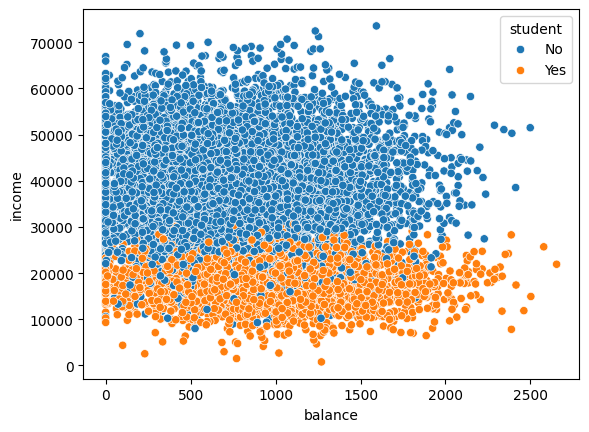

In [ ]:
sns.scatterplot(data=df, x = "balance", y = "income", hue = "student")


<Axes: xlabel='default', ylabel='income'>

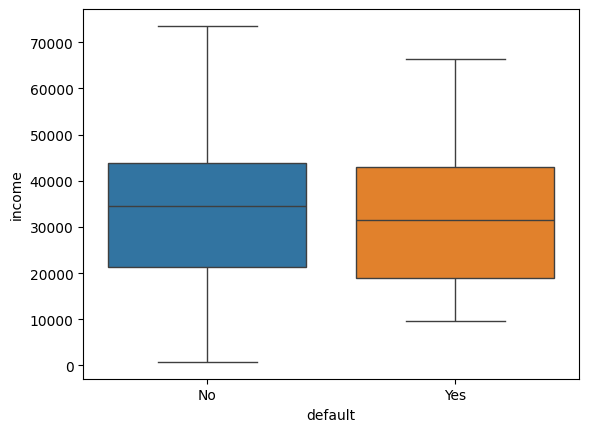

In [17]:
sns.boxplot(data = df, x = "default", y = "income", hue = "default")

<Axes: xlabel='default', ylabel='balance'>

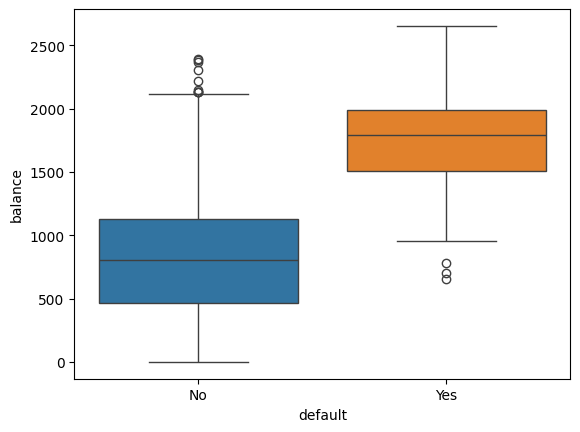

In [19]:
sns.boxplot(data = df, x = "default", y = "balance", hue = "default")

## Dummy encoding

In [20]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [23]:
# one-hot encoding
pd.get_dummies(df).head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,True,False,True,False
1,817.180407,12106.134700,True,False,False,True
2,1073.549164,31767.138947,True,False,True,False
3,529.250605,35704.493935,True,False,True,False
4,785.655883,38463.495879,True,False,True,False


In [25]:
# dummy encoding

pd.get_dummies(df, drop_first=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      10000 non-null  float64
 1   income       10000 non-null  float64
 2   default_Yes  10000 non-null  bool   
 3   student_Yes  10000 non-null  bool   
dtypes: bool(2), float64(2)
memory usage: 175.9 KB


In [26]:
pd.get_dummies(df, drop_first=True)

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False
...,...,...,...,...
9995,711.555020,52992.378914,False,False
9996,757.962918,19660.721768,False,False
9997,845.411989,58636.156984,False,False
9998,1569.009053,36669.112365,False,False


In [28]:
df_dummies = pd.get_dummies(df, drop_first=True)*1
df_dummies.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


## Logistic regression

### train/test/split

In [32]:
X, y = df_dummies.drop("default_Yes", axis = 1), df_dummies["default_Yes"]
X.head()

,balance,income,student_Yes
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_Yes, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

X_train.shape, X_test.shape

((6700, 3), (3300, 3))

In [41]:
print(f"Proportion default in traning data: {y_train.sum()/len(X_train):.3f}")
print(f"Proportion default in test data: {y_test.sum()/len(X_test):.3f}")


Proportion default in traning data: 0.033
Proportion default in test data: 0.033


## Scale dataset

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.mean() = }")
print(f"{scaled_X_train.std() = }")
print(f"{scaled_X_test.mean() = }")
print(f"{scaled_X_test.std() = }")

scaled_X_train.mean() = np.float64(7.830110247306577e-17)
scaled_X_train.std() = np.float64(1.0)
scaled_X_test.mean() = np.float64(-0.0054675735434032815)
scaled_X_test.std() = np.float64(0.9870951848219804)


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_X_train, y_train)
model.coef_

array([[ 2.83066218,  0.0095274 , -0.27466992]])

In [51]:
model.intercept_

array([-6.26854245])

test classify two sample

In [56]:
test_samples = pd.DataFrame(
    {"balance": [1500, 1500], "income": [40000, 40000], "student_Yes": [1, 0]}
)


test_samples

,balance,income,student_Yes
0,1500,40000,1
1,1500,40000,0


In [58]:
scaled_test_samples = scaler.transform(test_samples)
scaled_test_samples

array([[ 1.37268368,  0.47593334,  1.54286221],
       [ 1.37268368,  0.47593334, -0.64814602]])

In [59]:
model.predict_proba(scaled_test_samples)

array([[0.94279363, 0.05720637],
       [0.90028345, 0.09971655]])

In [60]:
model.predict(scaled_test_samples)

array([0, 0])

## Predict on all test data and evaluate

In [61]:
y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(3300,))

In [64]:
y_pred_proba = model.predict_proba(scaled_X_test)
y_pred_proba

array([[9.29649665e-01, 7.03503348e-02],
       [9.98410011e-01, 1.58998929e-03],
       [9.99982519e-01, 1.74809051e-05],
       ...,
       [9.99700108e-01, 2.99891553e-04],
       [2.76058537e-01, 7.23941463e-01],
       [9.97453972e-01, 2.54602761e-03]], shape=(3300, 2))

## Evaluate

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[3178,   12],
       [  77,   33]])

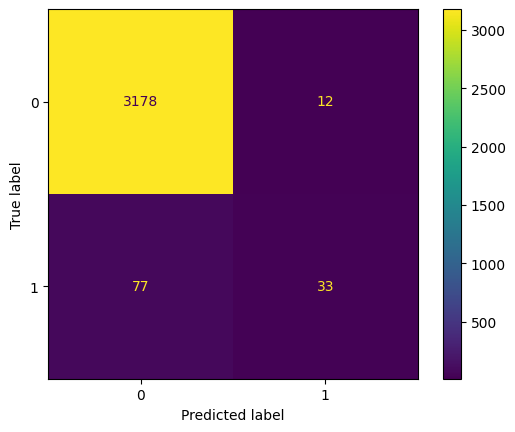

In [73]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [80]:
TP = 33
TN = 3178
FP = 12
FN = 77

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")


Accuracy: 0.973
Precision: 0.733
Recall: 0.300


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.73      0.30      0.43       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.71      3300
weighted avg       0.97      0.97      0.97      3300

